<a href="https://colab.research.google.com/github/magjanvaz/curso-python-us/blob/main/notebooks/practicas/linear_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(linear-programing)=
# Programación Lineal

Supongamos que tenemos una fábrica que es capaz de generar dos productos, el producto A y el producto B. Para producir tales bienes, la fábrica necesita invertir cierto dinero en materiales y otro tanto en mano de obra, con el fin de vender los productos y obtener el beneficio. Pongamos que los costes y beneficios por unidad producida son los siguientes 

|              | Producto A | Producto B |
|--------------|:----------:|:----------:| 
| Material     |      2     |      5     |
| Mano de obra |      4     |      2     |
| Beneficio    |      3     |      4     |

Partiendo de, digamos, 30 unidades monetarias destinadas a material y 20 para mano de obra, ¿cuál es el plan de producción óptimo para esta fabrica, es decir, cuántos productos de A y de B debe producir con los recursos disponibles? 

Este problema es lo que se conoce como un problema de **programación lineal**, que en general consiste en maximizar o minimizar una *función objetivo* lineal bajo una serie de igualdades o desigualdades que restringen el conjunto de posibles soluciones. En el ejemplo anterior podemos enunciar el problema del siguiente modo

$$
\begin{aligned}
\text{max. } \quad &  3x_1 + 4x_2\\
\text{s.t. }\quad &
\begin{array}{c}
2x_1 + 5x_2 \leq 30 \\
4x_1 + 2x_2 \leq 20 \\
x_1, x_2 \geq 0 
\end{array}
\end{aligned}   
$$

Más generalmente, lo que queremos es minimizar una función de coste lineal $c^\intercal x = \sum_{i=1}^n c_ix_i$ sobre un conjunto de valores factibles de $x=(x_1, x_2, \dots, x_n)$ sujeto a las restricciones dadas por desigualdades o igualdades. Es decir, 

$$
\begin{aligned}
\text{min. } \quad &  c^\intercal x\\
\text{s.t. }\quad &
\begin{array}{c}
a_i^\intercal x \geq b_i \quad & i \in M_1\\
a_i^\intercal x \leq b_i \quad & i \in M_2\\
a_i^\intercal x = b_i \quad & i \in M_3\\
x_j \geq 0 \quad & j \in N_1\\
x_j \leq 0 \quad & j \in N_2\\
x_j \text{ sin restricción} \quad & j \in N_3
\end{array}
\end{aligned}   
$$

Donde $N_k$, $M_k$ son conjuntos de índices por decidir, $a_i$ vectores de $\mathbb{R}^n$ y $b_i \in \mathbb{R}$. Algunas definiciones importantes 
- Un vector $x$ que satisface las condicines es llamada una **solución factible**. 
- La colección de soluciones factibles se denomina la **región factible**. 
- Una solución factible que minimiza la función de coste se denomina **solución óptima**. 
- El valor de la función de coste en la solución el óptima es el **valor óptimo**. 
- Si el conjunto factible es vacío, decimos que el problema es **infactible**. 

Volviendo al problema anterior, vamos a usar `matplotlib` para representar el conjunto factible y algunas rectas en las que la función objetivo vale igual. El gradiente nos da la dirección de máximo cambio y es fácil intuir en qué punto se encuentra la solución óptima. 

In [ ]:
%config InlineBackend.figure_format='retina'

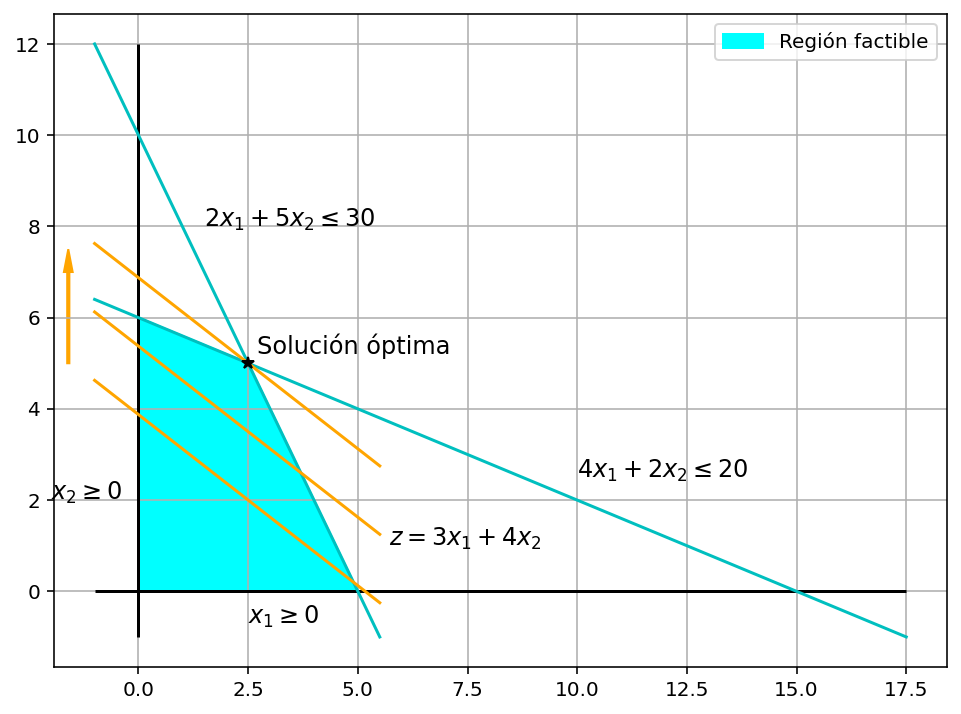

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Dibujamos las líneas de restricción
range1 = np.linspace(-1, 17.5, 100)
range2 = np.linspace(-1, 5.5, 100)
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(range1, 6-0.4*range1, color="c")
ax.plot(range2, 10-2*range2, color="c")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Dibujamos la región factible
feasible_set = Polygon(
    np.array(
        [
            [0, 0], 
            [0, 6], 
            [2.5, 5], 
            [5, 0]
        ]
    ), 
    color="cyan", 
    label="Región factible"
)
ax.add_patch(feasible_set)

# Dibujamos la función objetivo
ax.plot(range2, 3.875-0.75*range2, color="orange")
ax.plot(range2, 5.375-0.75*range2, color="orange")
ax.plot(range2, 6.875-0.75*range2, color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Dibujamos la solución óptima 
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Solución óptima", size=12)
ax.legend()

plt.show()

## La forma estándar

Con el fin de identificar problemas similares y unificar una metodología de resolución (por ejemplo para utilizar en software de terceros) podemos convertir cualquier problema de programación lineal en un formato estándar. Para ello, vamos a reducir todo problema a uno del tipo 

$$
\begin{aligned}
\text{min. } \quad &  c^\intercal x\\
\text{s.t. }\quad &
\begin{array}{c}
Ax = b\\
x \geq 0
\end{array}
\end{aligned}   
$$

donde como antes, $x, c \in \mathbb{R}^n$, $b \in \mathbb{R}^m$ y $A$ una matrix real de dimensión $m\times n$. 

Para conseguir la forma estándar partiendo de un problema de programación lineal general, podemos realizar las siguientes transformaciones: 
- **Función objetivo**: si tenemos una función que maximizar, lo que hacemos es minimizar su inverso aditivo. 
- **Variables de decisión con desigualdad**: dada una variable $x_j$ sujeta a $x_j \leq 0$, consideremos $x_j^{'} = -x_j$ y la sustituimos en el problema original.
- **Variables de decisión sin restricciones**: aquí lo que hacemos es realizar la descomposición

$$ x_j = x_j^+ + x_j^- $$

donde $x_j^+ = \max\{x_j, 0\}$, $x_j^- = \max\{-x_j, 0\}$. 
- **Restricciones con desigualdad**: Dada una restricción del tipo $\sum_{i=1}^n a_ix_i \leq b$, introducimos una nueva variable, denominada **variable de holgura**, $s_j$ y cambiamos la restricción por 

$$
\begin{array}{c}
\sum_{i=1}^n a_ix_i + s_j = b\\
s_j \geq 0
\end{array}
$$

Transformemos el problema inicial a su formato estándar. Recordemos que el problema era el siguiente 

$$
\begin{aligned}
\text{max. } \quad &  3x_1 + 4x_2\\
\text{s.t. }\quad &
\begin{array}{c}
2x_1 + 5x_2 \leq 30 \\
4x_1 + 2x_2 \leq 20 \\
x_1, x_2 \geq 0 
\end{array}
\end{aligned}   
$$

Realizando las tranformaciones necesarias obtenemos 

$$
\begin{aligned}
\text{min. } \quad &  -(3x_1 + 4x_2)\\
\text{s.t. }\quad &
\begin{array}{c}
2x_1 + 5x_2 + s_1 = 30 \\
4x_1 + 2x_2 + s_2 = 20 \\
x_1, x_2, s_1, s_2 \geq 0 
\end{array}
\end{aligned}   
$$

## Utilizando `scipy` para resolver problemas lineales.

Vamos a utilizar el paquete `scipy.optimize` para resolver el problema planteado anteriormente. En concreto la función `linprog` acepta problemas lineales planteados de la siguiente forma

$$
\begin{aligned}
\text{min. } \quad &  c^\intercal x\\
\text{s.t. }\quad &
\begin{array}{c}
A_{\text{ub}}x \leq b_{\text{ub}}\\
A_{\text{eq}}x = b_{\text{eq}}\\
l \leq x \leq u
\end{array}
\end{aligned}   
$$

es decir, más generales que la forma estándar. Por defecto tenemos que $l=0$ y que `u=None`. Para resolver el problema 

$$
\begin{aligned}
\text{max. } \quad &  3x_1 + 4x_2\\
\text{s.t. }\quad &
\begin{array}{c}
2x_1 + 5x_2 \leq 30 \\
4x_1 + 2x_2 \leq 20 \\
x_1, x_2 \geq 0 
\end{array}
\end{aligned}   
$$

utilizamores el siguiente código

In [ ]:
from scipy.optimize import linprog

# parametros de la función de coste
c = np.array([3, 4])

# Matriz de desigualdades
A_ub = np.array(
    [
        [2, 5],
        [4, 2]
    ]
)
b_ub = np.array([30, 20])

# Resolvemos el proble
# Podemos un signo negativo a c porque linprog busca el mínimo por defecto
s = linprog(-c, A_ub=A_ub, b_ub=b_ub, method='revised simplex')

s

     con: array([], dtype=float64)
     fun: -27.5
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([2.5, 5. ])

Notemos el signo negativo que hemos añadido al primer argumento de `linprog` para encontrar un máximo y no un mínimo de la función. Estamos usando la función `linprog` como una caja negra, pero en realidad lo que se hace por debajo es transformar el problema en su forma estándar y resolverlo usando el método simplex. Aún con ello, muchas veces tendremos que transformar nuestro problema para que tome la estructura aceptada por `linprog`.  

:::{exercise}
:label: linear-programming-1

Transforma manualmente el problema anterior a la forma estándar y resuélvelo usando `linprog` y comprueba que las soluciones óptimas coinciden.

:::

:::{solution} linear-programming-1
:class: dropdown

Ya hemos visto anteriormente la forma que toma el problema si lo pasamos a la forma estándar, 

$$
\begin{aligned}
\text{min. } \quad &  -(3x_1 + 4x_2)\\
\text{s.t. }\quad &
\begin{array}{c}
2x_1 + 5x_2 + s_1 = 30 \\
4x_1 + 2x_2 + s_2 = 20 \\
x_1, x_2, s_1, s_2 \geq 0 
\end{array}
\end{aligned}   
$$

Simplemente tenemos que añadir dos variables de holgura y crear los argumentos `A_eq`, `b_eq`

```
# Añadimos un cero al vector de parámetros
c = np.array([3, 4, 0, 0])

# Ahora tenemos una matriz para las igualdades
A_eq = np.array(
    [
        [2, 5, 1, 0],
        [4, 2, 0, 1]
    ]
)
b_eq = np.array([30, 20])

# dejamos l y u por defecto
s = linprog(-c, A_eq=A_eq, b_eq=b_eq, method="revised simplex")

s
```

:::


:::{exercise}
:label: linear-programming-2

Resuelve el siguiente problema de inversión utilizando programación lineal: 

Un fondo de inversión cuenta con 100.000$ para ser invertidos a lo largo de 3 años. Dicho fondo tiene a su disposición tres tipo de inversiones: 

1. **Renta fija**: En este caso el fondo va a pagar al principio de cada año la misma cantidad, recibiendo al final del tercer año el 130% del capital total invertido. El fondo debe decidir al principio del primer año la cantidad a depositar en dicha inversión. 

2. **Cuenta bancaria**: El fondo deposita al principio de cada año una cantidad a su elección y recibe el capital más el 6% de interés al final de cada año. Además, a principio de cada año el fondo puede pedir prestados hasta 20.000$ asumiendo la deuda más un 6% de interés al final de dicho año. El fondo puede decidir cuánto deposita o pide prestado al principio de cada año. 

3. **Bonos corporativos**: Al principio del segundo año, el fondo tiene la opción de participar en unos bonos corporativos con un capital de hasta 50.000$, de modo que a finales del tercer año recibirá un pago por valor del 130% de la cantidad invertida en el bono. 

:::